# Importing Libraries

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     LeaveOneOut,
                                     cross_val_score,
                                     GridSearchCV
                                     )
from sklearn.linear_model import (LinearRegression,
                                  Lasso,
                                  Ridge
                                  )
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_error,
                             root_mean_squared_error
                             )

# Understand Data

In [14]:
df = pd.read_csv("housing.csv")

In [15]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [16]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [17]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  str    
dtypes: float64(9), str(1)
memory usage: 1.7 MB


In [18]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Data Preprocessing

## Basic Visualization

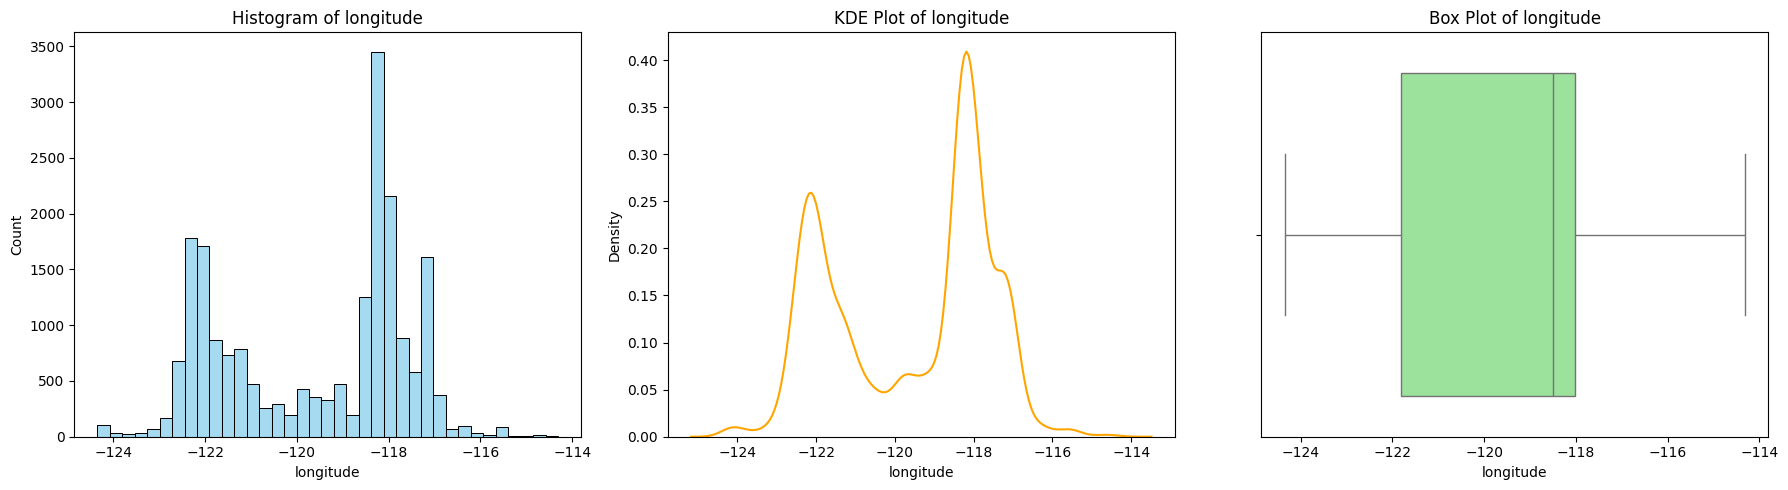

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


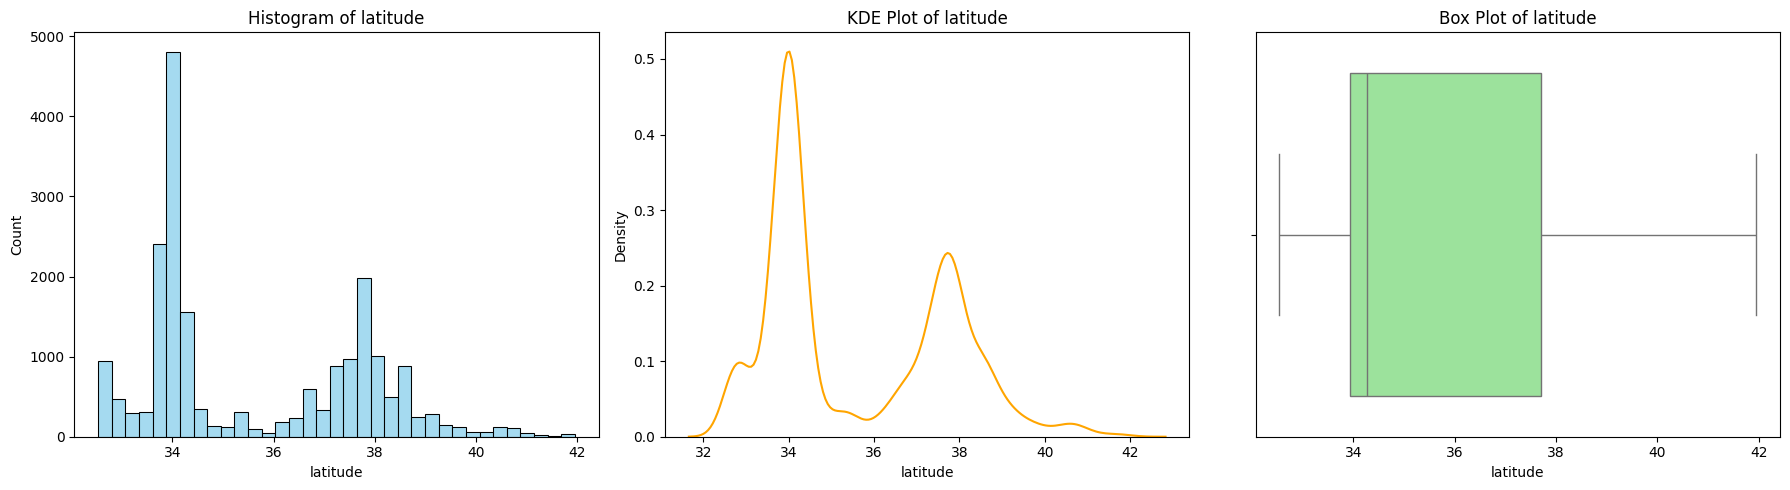

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


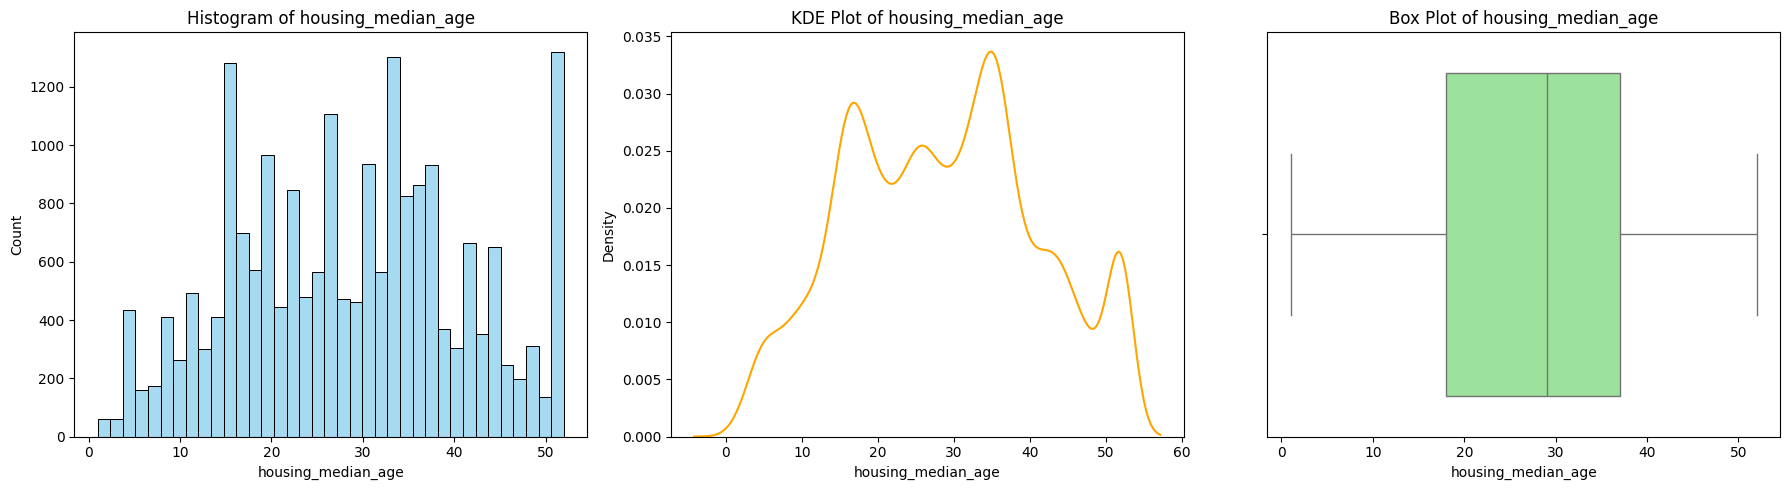

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


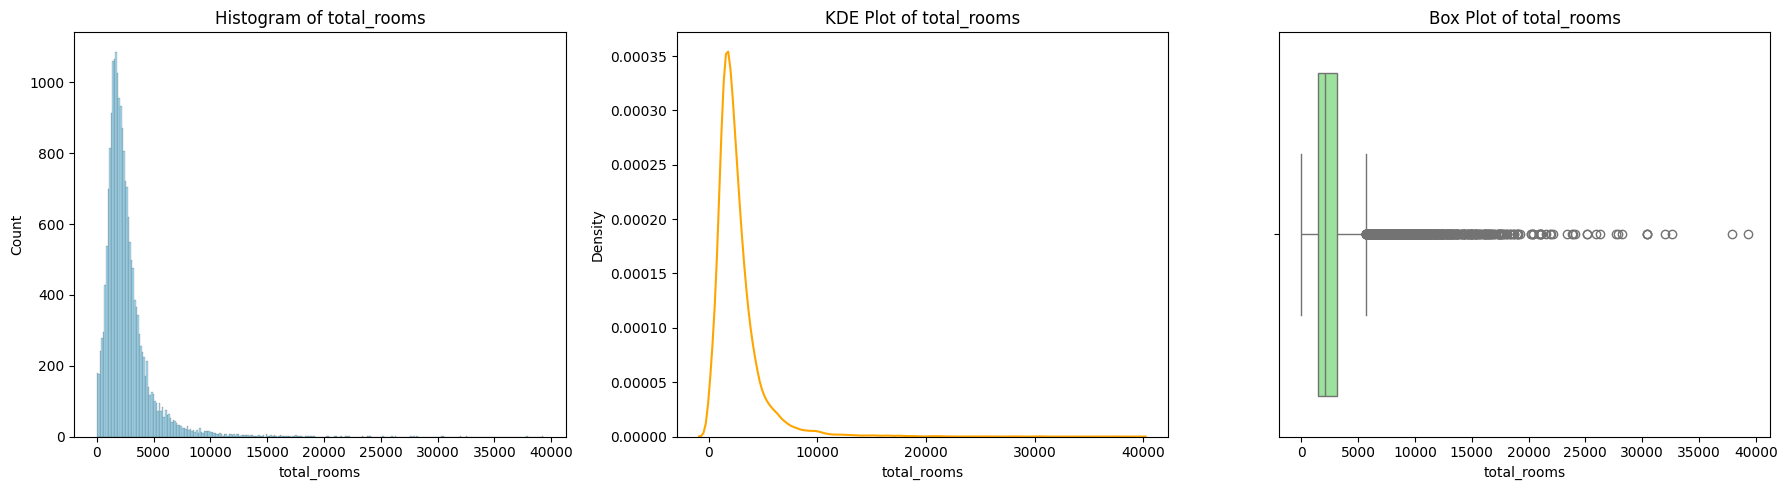

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


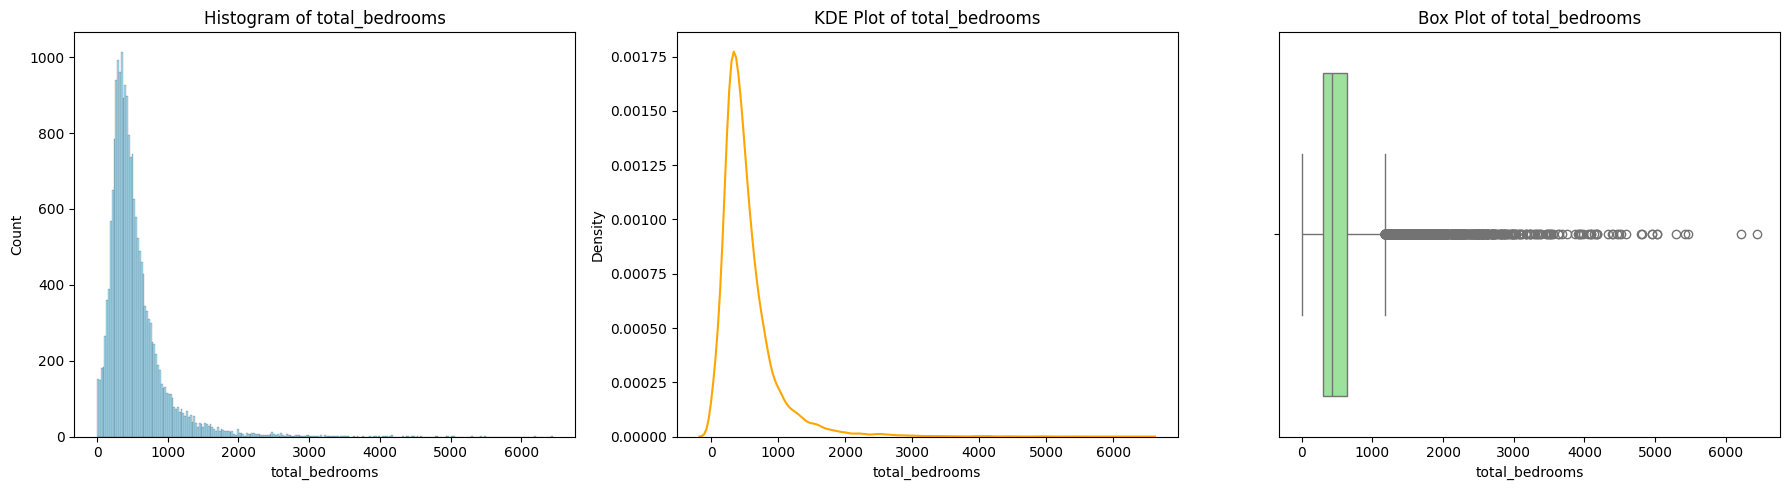

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


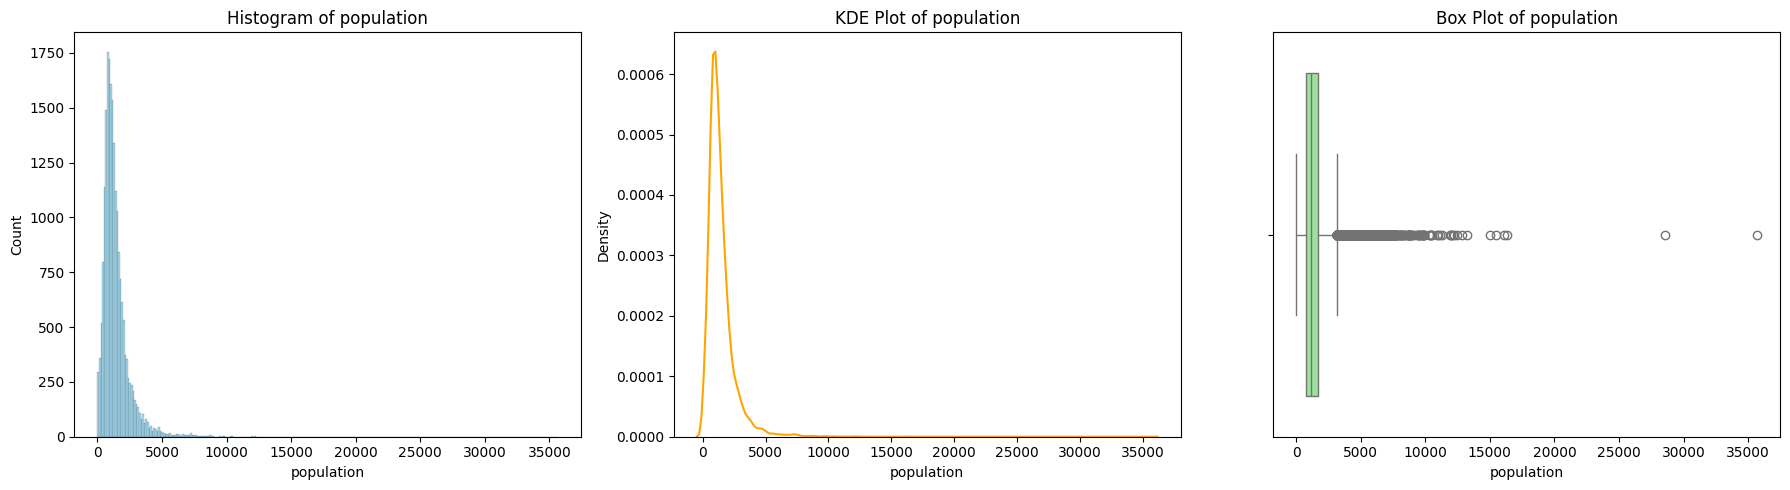

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


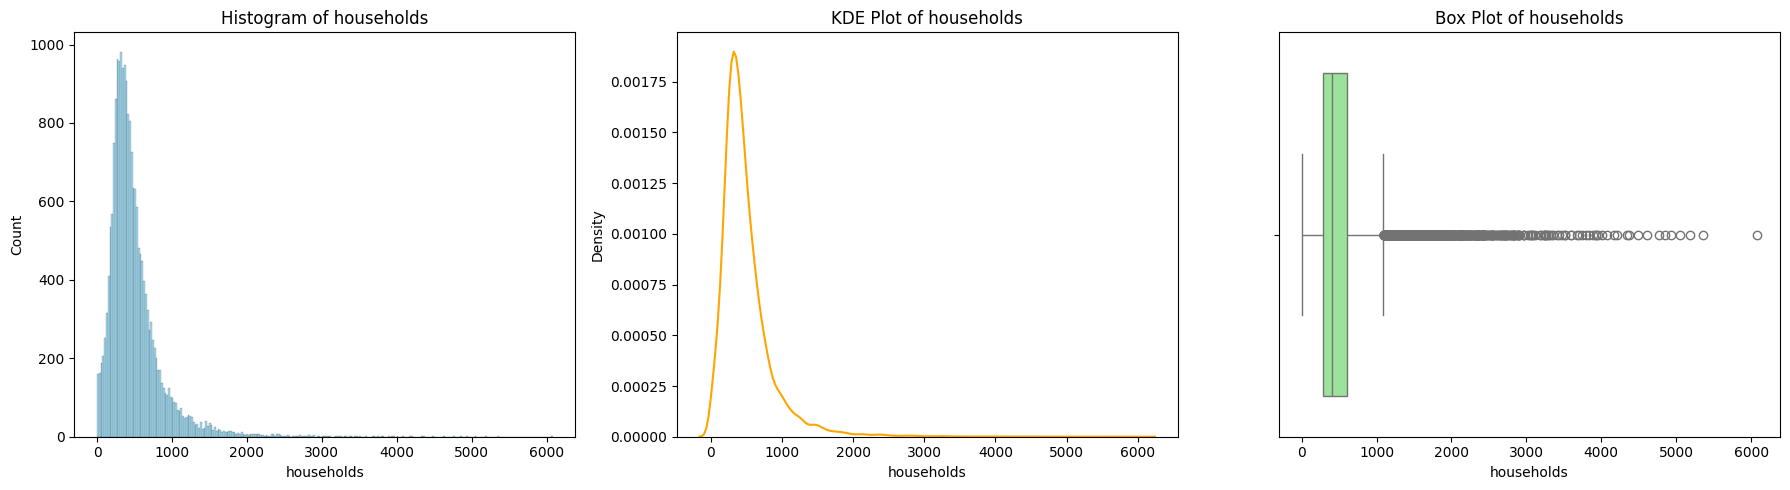

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


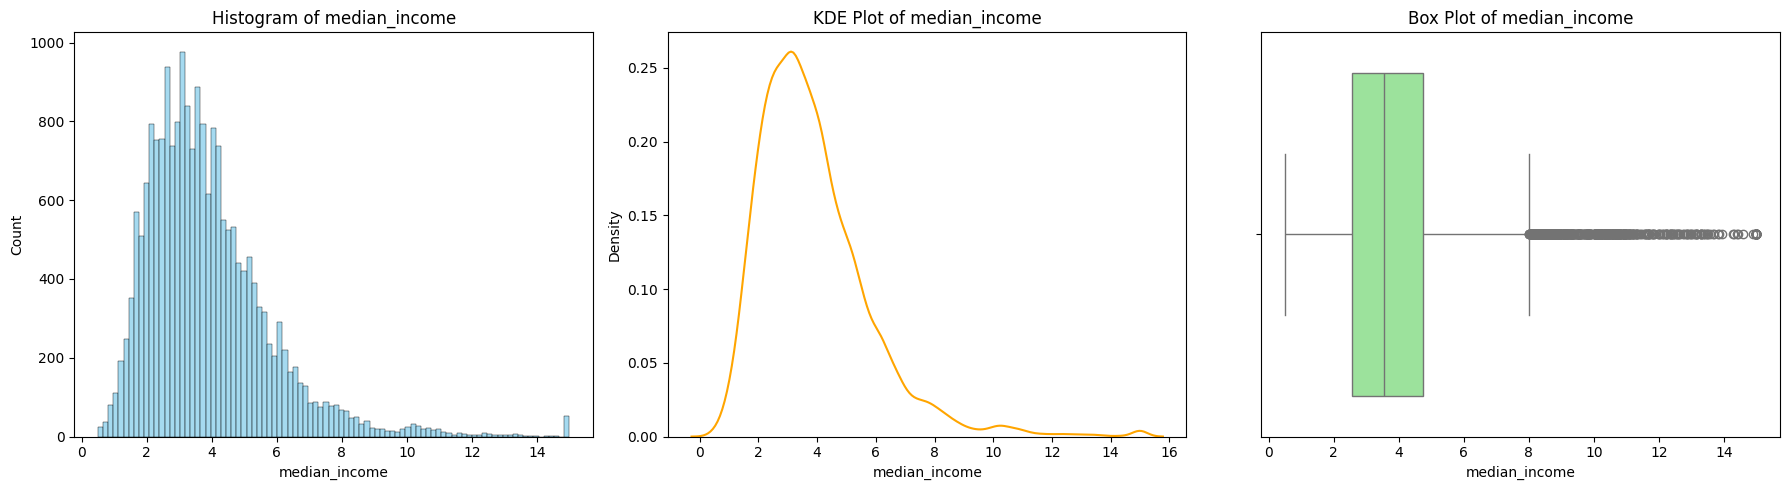

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


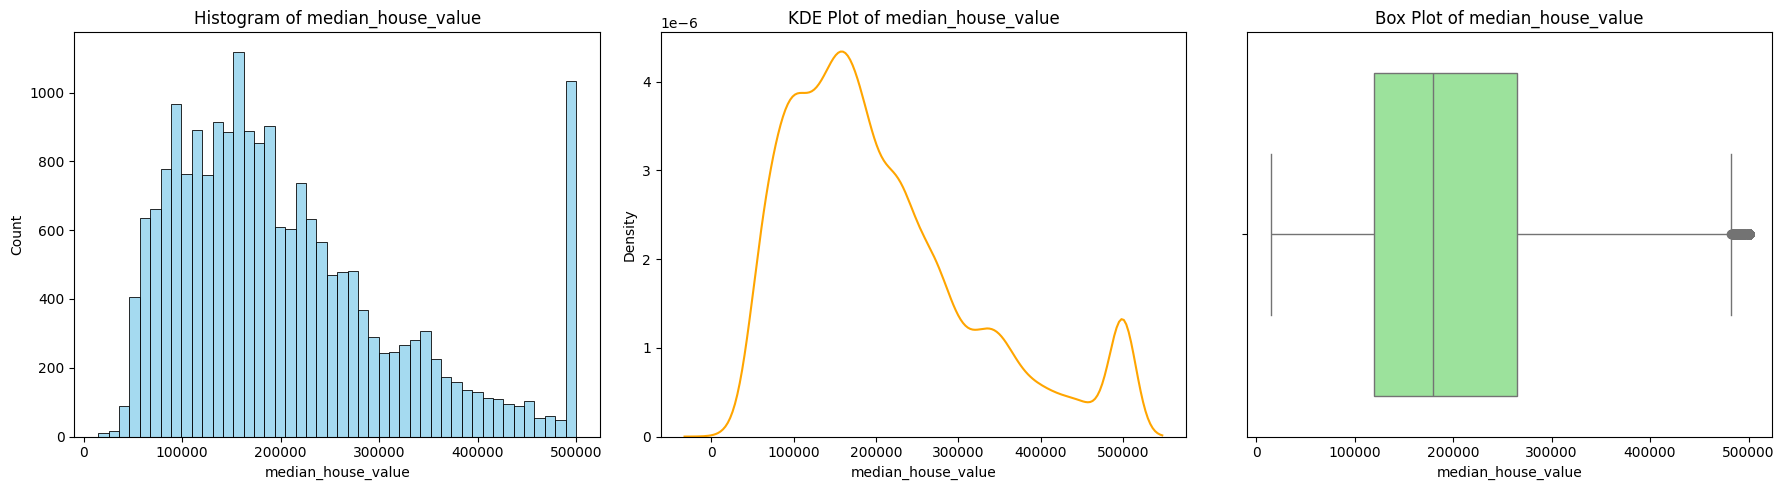

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [19]:
for col in df.select_dtypes(["int64", "float64"]):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    sns.histplot(df[col], ax=axes[0], color="skyblue")
    axes[0].set_title(f"Histogram of {col}")

    sns.kdeplot(df[col], ax=axes[1], color="orange")
    axes[1].set_title(f"KDE Plot of {col}")

    sns.boxplot(x=df[col], ax=axes[2], color="lightgreen")
    axes[2].set_title(f"Box Plot of {col}")

    plt.tight_layout()
    plt.show()

    print("-" * 200)
    print("-" * 200)

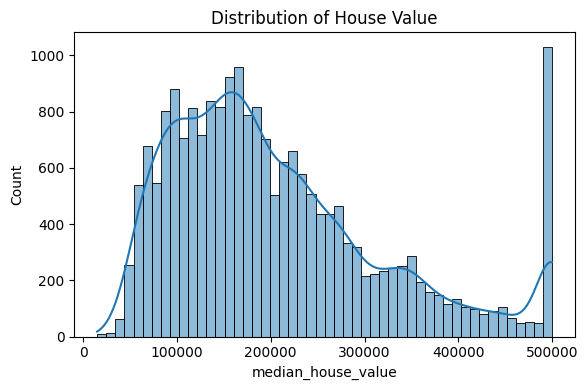

In [20]:
plt.figure(figsize=(6, 4))
sns.histplot(df["median_house_value"], bins=50, kde=True)
plt.title("Distribution of House Value")
plt.tight_layout()
plt.show()

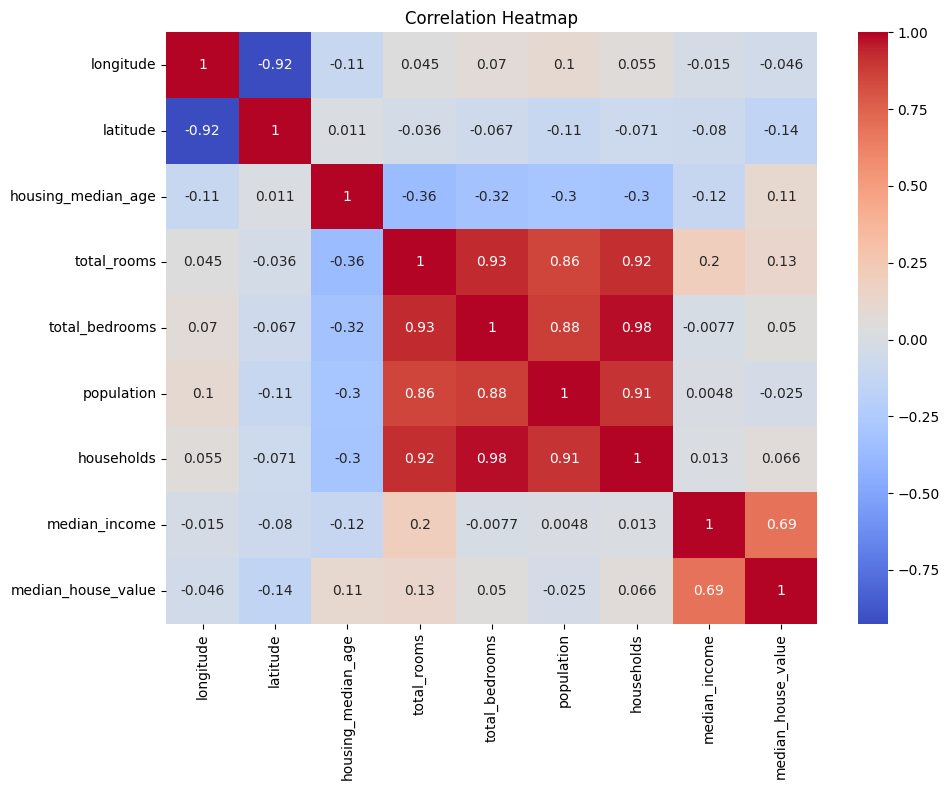

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

## Feature Engineering

In [22]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [23]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_ratio"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

## Outliers Detection and Removal

In [24]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

In [25]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [26]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_ratio,population_per_household
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,4.761658,0.231774,2.139896
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.931907,0.192899,2.128405
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,4.797527,0.221327,1.788253
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


# Best Model Finding

## Train Test Split

In [27]:
x = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Pipeline

In [29]:
num_cols = x.select_dtypes(["int64", "float64"]).columns
cat_cols = x.select_dtypes("str").columns

In [30]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore")),
])

preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols),
])

## Training Multiple Models

In [31]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Support Vector Machine Regression": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "AdaBoost Regression": AdaBoostRegressor(),
    "XGBoost Regression": XGBRegressor(random_state=42),
}

In [32]:
result = []

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model),
    ])

    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    result.append({
        "Model_Name": model_name,
        "R2_Score": r2,
        "Mean_Squared_Error": mse,
        "Mean_Absolute_Error": mae,
        "Root Mean_Squared_Error": rmse,
    })

    print(f"Model :- {model_name}")
    print(f"R2 Score :- {r2}")
    print(f"Mean Squared Error :- {mse}")
    print(f"Mean_Absolute_Error :- {mae}")
    print(f"Root Mean_Squared_Error :- {rmse}")
    print("-" * 80)

df_result = pd.DataFrame(result)

Model :- Linear Regression
R2 Score :- 0.6582140066730209
Mean Squared Error :- 2904236656.001834
Mean_Absolute_Error :- 40607.20815765512
Root Mean_Squared_Error :- 53890.97007850048
--------------------------------------------------------------------------------


c:\Users\Admin\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.709e+11, tolerance: 1.062e+10
  model = cd_fast.enet_coordinate_descent(


Model :- Lasso Regression
R2 Score :- 0.6581981687636187
Mean Squared Error :- 2904371234.4747343
Mean_Absolute_Error :- 40608.87938427894
Root Mean_Squared_Error :- 53892.21868205775
--------------------------------------------------------------------------------
Model :- Ridge Regression
R2 Score :- 0.6581092374688109
Mean Squared Error :- 2905126904.780975
Mean_Absolute_Error :- 40616.276148730925
Root Mean_Squared_Error :- 53899.22916685335
--------------------------------------------------------------------------------
Model :- Support Vector Machine Regression
R2 Score :- -0.029290527747535933
Mean Squared Error :- 8746125759.167862
Mean_Absolute_Error :- 73869.57828272115
Root Mean_Squared_Error :- 93520.72368821716
--------------------------------------------------------------------------------
Model :- Decision Tree Regression
R2 Score :- 0.6056674222373881
Mean Squared Error :- 3350737447.8574677
Mean_Absolute_Error :- 39032.40292207792
Root Mean_Squared_Error :- 57885.554742

In [33]:
df_result

,Model_Name,R2_Score,Mean_Squared_Error,Mean_Absolute_Error,Root Mean_Squared_Error
0,Linear Regression,0.658214,2.904237e+09,40607.208158,53890.970079
1,Lasso Regression,0.658198,2.904371e+09,40608.879384,53892.218682
2,Ridge Regression,0.658109,2.905127e+09,40616.276149,53899.229167
3,Support Vector Machine Regression,-0.029291,8.746126e+09,73869.578283,93520.723688
4,Decision Tree Regression,0.605667,3.350737e+09,39032.402922,57885.554743
5,Random Forest Regression,0.805901,1.649306e+09,27815.575649,40611.650001
6,AdaBoost Regression,0.455952,4.622903e+09,58798.089055,67991.931990
7,XGBoost Regression,0.825342,1.484107e+09,26654.414738,38524.104094


In [34]:
df_result.sort_values(by="R2_Score", ascending=False)

,Model_Name,R2_Score,Mean_Squared_Error,Mean_Absolute_Error,Root Mean_Squared_Error
7,XGBoost Regression,0.825342,1.484107e+09,26654.414738,38524.104094
5,Random Forest Regression,0.805901,1.649306e+09,27815.575649,40611.650001
0,Linear Regression,0.658214,2.904237e+09,40607.208158,53890.970079
1,Lasso Regression,0.658198,2.904371e+09,40608.879384,53892.218682
2,Ridge Regression,0.658109,2.905127e+09,40616.276149,53899.229167
4,Decision Tree Regression,0.605667,3.350737e+09,39032.402922,57885.554743
6,AdaBoost Regression,0.455952,4.622903e+09,58798.089055,67991.931990
3,Support Vector Machine Regression,-0.029291,8.746126e+09,73869.578283,93520.723688


In [35]:
best_model = XGBRegressor()

* By seing results XGBoost Regression is best for Model

## Cross Validation

* Since StratifiedKFold only work for classification
* LOO cannot work bacause we are scoring in based on r2 score
* We will use only KFold here

In [36]:
pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", best_model),
])

cv_score = cross_val_score(
    estimator=pipe,
    X=x_train,
    y=y_train,
    scoring="r2",
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
)

In [37]:
cv_score.mean()

np.float64(0.8159799059270515)

## Gridsearch

In [38]:
param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [3, 6, 10], # XGBoost usually performs better with shallower trees (3-10)
    "model__learning_rate": [0.01, 0.1], # Important for XGBoost
    "model__subsample": [0.8, 1.0] # Helps prevent overfitting
}

In [39]:
model = XGBRegressor()

In [40]:
final_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model),
])

In [41]:
gridcv = GridSearchCV(
    estimator=final_pipe,
    param_grid=param_grid,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring="r2",
)

In [42]:
gridcv.fit(x_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","Pipeline(step...=None, ...))])"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__learning_rate': [0.01, 0.1], 'model__max_depth': [3, 6, ...], 'model__n_estimators': [100, 200], 'model__subsample': [0.8, 1.0]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",KFold(n_split... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : t

In [43]:
gridcv.best_params_

{'model__learning_rate': 0.1,
 'model__max_depth': 6,
 'model__n_estimators': 200,
 'model__subsample': 0.8}

In [44]:
best_model = gridcv.best_estimator_

In [45]:
final_pred = best_model.predict(x_test)

In [46]:
final_r2 = r2_score(y_test, final_pred)
final_mse = mean_squared_error(y_test, final_pred)
final_mae = mean_absolute_error(y_test, final_pred)
final_rmse = root_mean_squared_error(y_test, final_pred)

In [47]:
print(f"R2 Score :- {final_r2}")
print(f"Mean Squared Error :- {final_mse}")
print(f"Mean_Absolute_Error :- {final_mae}")
print(f"Root Mean_Squared_Error :- {final_rmse}")

R2 Score :- 0.8310901714152943
Mean Squared Error :- 1435266878.4334486
Mean_Absolute_Error :- 25738.958531605113
Root Mean_Squared_Error :- 37884.91623896572


# Prediction

In [48]:
x.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_ratio',
       'population_per_household'],
      dtype='str')

In [49]:
def predict_price(longitude, latitude, housing_median_age, total_rooms,
                  total_bedrooms, population, households, median_income,
                  ocean_proximity, rooms_per_household, bedrooms_ratio,
                  population_per_household):
    input_data = {
        "longitude": longitude,
        "latitude": latitude,
        "housing_median_age": housing_median_age,
        "total_rooms": total_rooms,
        "total_bedrooms": total_bedrooms,
        "population": population,
        "households": households,
        "median_income": median_income,
        "ocean_proximity": ocean_proximity,
        "rooms_per_household": rooms_per_household,
        "bedrooms_ratio": bedrooms_ratio,
        "population_per_household": population_per_household,
    }

    input_df = pd.DataFrame(input_data, index=[0])

    prediction = best_model.predict(input_df)

    return prediction[0]

In [50]:
predict_price(
    longitude=-117.24,
    latitude=32.79,
    housing_median_age=20.0,
    total_rooms=961.0,
    total_bedrooms=278.0,
    population=525.0,
    households=254.0,
    median_income=3.1838,
    ocean_proximity='NEAR OCEAN',
    rooms_per_household=3.7835,
    bedrooms_ratio=0.2893,
    population_per_household=2.0669
)

np.float32(230437.8)

In [51]:
predict_price(
    longitude=-118.14,
    latitude=33.92,
    housing_median_age=31.0,
    total_rooms=3731.0,
    total_bedrooms=853.0,
    population=2313.0,
    households=801.0,
    median_income=3.2237,
    ocean_proximity='<1H OCEAN',
    rooms_per_household=4.6579,
    bedrooms_ratio=0.2286,
    population_per_household=2.8876
)

np.float32(194258.64)

In [52]:
predict_price(
    longitude=-121.29,
    latitude=38.01,
    housing_median_age=2.0,
    total_rooms=6403.0,
    total_bedrooms=1116.0,
    population=3327.0,
    households=957.0,
    median_income=4.4871,
    ocean_proximity='INLAND',
    rooms_per_household=6.6907,
    bedrooms_ratio=0.1743,
    population_per_household=3.4765
)

np.float32(145389.97)